In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
 #Load the data
data = pd.read_csv('../data/MachineLearningRating_v3.csv')

# Display the first few rows of the dataframe
data.head()

/tmp/ipykernel_13123/3149716167.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/MachineLearningRating_v3.csv')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


#1.1 Handling Missing Data

In [4]:
# Convert data types to more memory-efficient formats
for col in data.select_dtypes(include=['float64']).columns:
    data[col] = pd.to_numeric(data[col], downcast='float')

for col in data.select_dtypes(include=['int64']).columns:
    data[col] = pd.to_numeric(data[col], downcast='integer')

1.2 Feature Engineering

In [5]:


# Convert TransactionMonth to datetime and extract relevant features
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'], errors='coerce')
data['TransactionYear'] = data['TransactionMonth'].dt.year
data['TransactionMonth'] = data['TransactionMonth'].dt.month

# Feature Engineering
data['VehicleAge'] = 2024 - data['RegistrationYear']
data['ProfitMarginRatio'] = data['TotalPremium'] - data['TotalClaims']
data['ProfitMarginRatio'] = data['ProfitMarginRatio'].replace([np.inf, -np.inf], 0)
data['ProfitMarginRatio'] = data['ProfitMarginRatio'].fillna(0)



In [6]:
# Drop irrelevant or non-numeric columns before encoding
data.drop(['UnderwrittenCoverID', 'PolicyID', 'Country', 'MainCrestaZone', 'SubCrestaZone',
           'make', 'Model', 'bodytype', 'Title', 'Language', 'Bank', 'AccountType', 'LegalType', 'MaritalStatus'], axis=1, inplace=True)


1.3 Encoding Categorical Data

In [7]:
# Encoding Categorical Data
categorical_features = ['Province', 'PostalCode', 'Gender', 'VehicleType', 'CoverType']


In [8]:
# Reduce cardinality by grouping infrequent categories (if necessary)
for feature in categorical_features:
    top_categories = data[feature].value_counts().nlargest(10).index
    data[feature] = np.where(data[feature].isin(top_categories), data[feature], 'Other')

In [9]:
# One-hot encoding with memory efficiency
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Ensure all columns are numeric and handle non-numeric values
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)

1.4 Train-Test Split

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-Test Split
X = data.drop(['TotalPremium', 'TotalClaims'], axis=1)
y = data['TotalPremium']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:


# Verify the transformations
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Sample feature names: {X.columns[:5]}")



X_train shape: (700068, 70)
X_test shape: (300030, 70)
Sample feature names: Index(['TransactionMonth', 'IsVATRegistered', 'Citizenship', 'ItemType',
       'mmcode'],
      dtype='object')


Step 2: Modeling Techniques

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")


Linear Regression - MSE: 27987.475544524073, R2: 0.4722853861054265


2.2 Random Forest

In [ ]:


from sklearn.ensemble import RandomForestRegressor

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")



2.3 XGBoost

In [13]:


import xgboost as xgb

# XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MSE: {mse_xgb}, R2: {r2_xgb}")

XGBoost - MSE: 2862.974204052726, R2: 0.9460175204341568


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split data into training and test sets (replace with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Evaluation for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results for both models
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")
print(f"XGBoost - MSE: {mse_xgb}, R2: {r2_xgb}")


Random Forest - MSE: 49.13037796264746, R2: 0.9982191511509357
XGBoost - MSE: 63.46459918204884, R2: 0.9976995727878257


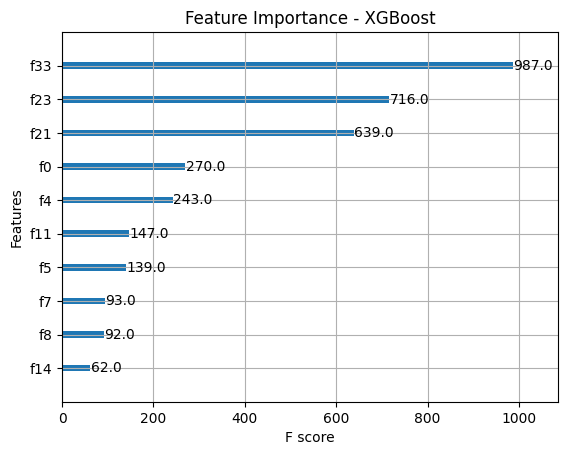

In [13]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Feature importance using XGBoost
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance - XGBoost')
plt.show()


Feature Importance Analysis

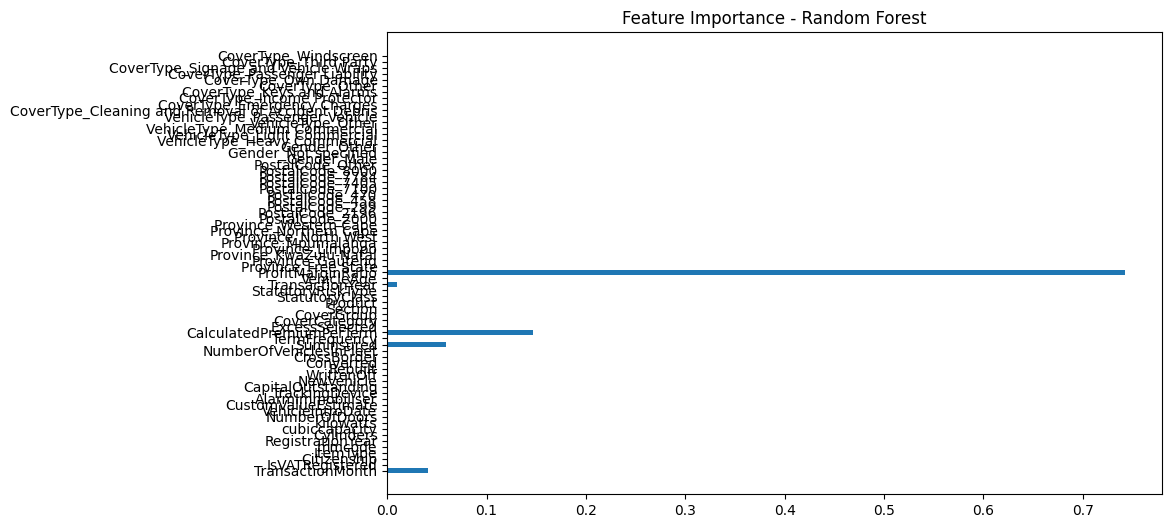

In [16]:
import matplotlib.pyplot as plt

# Feature importance using Random Forest
feature_importances_rf = rf_model.feature_importances_
features = X.columns  # Use original feature names

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances_rf)
plt.title('Feature Importance - Random Forest')
plt.show()


SHAP Explanation for XGBoost:

SHAP Explanation for Random Forest:

In [12]:

import xgboost as xgb
import lime
from lime.lime_tabular import LimeTabularExplainer

# Example: Train XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# LIME Explainer
explainer = LimeTabularExplainer(X.values, training_labels=y, mode='regression')
exp = explainer.explain_instance(X_test[0], xgb_model.predict)

# Show explanation for a specific instance
exp.show_in_notebook()


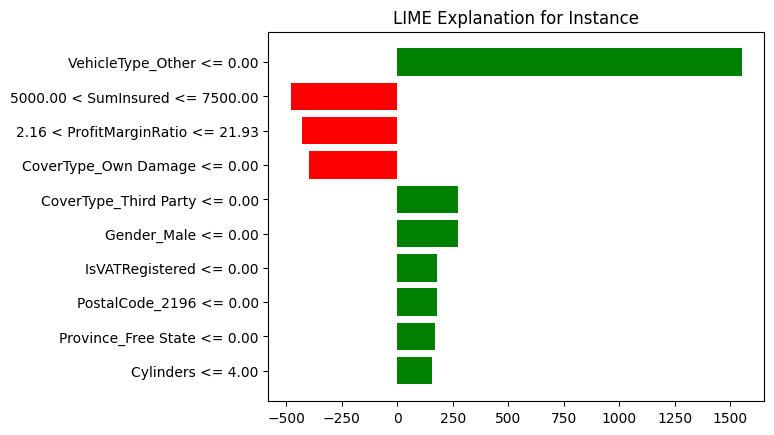

In [17]:
import xgboost as xgb
import lime
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# LIME Explainer
explainer = LimeTabularExplainer(
    X_train.values,
    training_labels=y_train,
    feature_names=X_train.columns,
    mode='regression'
)

# Explain a specific instance
instance_index = 0  # Choose the instance to explain
exp = explainer.explain_instance(X_test.iloc[instance_index].values, xgb_model.predict)

# Display explanation in notebook
exp.show_in_notebook()

# Visualize explanation as a bar chart
exp.as_pyplot_figure()
plt.title("LIME Explanation for Instance")
plt.show()
